# Imports

In [27]:
import sys
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout,confidence_interval,multiple_runs
from model.utils import SocialPolicy

# Parameters settings

Default parameters. Unless explicitly overriden, these values are used in all scenarios

In [28]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.0,
    mask_efficacy = 0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability =    0.1,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    herding_behavior_mean = 0.7,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20),
    extroversion_mean = 0.5,
    extroversion_stdev = 0.2,
    min_behaviors_to_copy = 1 
)


# Simulation setup

In [29]:
population_size = 1000
simulation_cycles = 90 # days

In [30]:
seed = 314

In [31]:
np.random.seed(seed)
scenario = {}

# Scenarios

## Scenario 1

Do nothing.  In order to print out where every agent is for every step of the day, every 20 days, set debug to True when you make the CovidModel.  You can also set debug to True on multiple runs to print stats out there as well.

In [32]:
sc = 1
params = copy.deepcopy(common_parameters)
set_parameters(params)
#model = CovidModel(debug = True)
model = CovidModel()
seed = 4
np.random.seed(seed)
setup_city_layout(model, population_size)

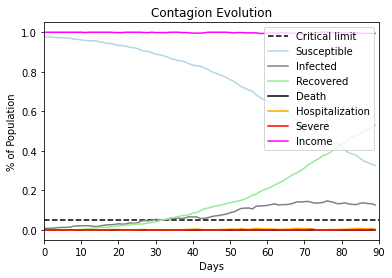

In [33]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

To save time these samples were run with 3 runs, but significant results often require 30 runs, so these numbers should be changed during debugging.

In [34]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[4052, 5583, 6464, 9923, 1747, 3119, 1778, 6102, 4914, 1017, 8514, 7825, 677, 4199, 9871, 1137, 4796, 6963, 8716, 405, 28, 7019, 7995, 6231, 4653, 9481, 8787, 2560, 185, 8532]
run with seed 4052:
run with seed 5583:
run with seed 6464:
run with seed 9923:
run with seed 1747:
run with seed 3119:
run with seed 1778:
run with seed 6102:
run with seed 4914:
run with seed 1017:
run with seed 8514:
run with seed 7825:
run with seed 677:
run with seed 4199:
run with seed 9871:
run with seed 1137:
run with seed 4796:
run with seed 6963:
run with seed 8716:
run with seed 405:
run with seed 28:
run with seed 7019:
run with seed 7995:
run with seed 6231:
run with seed 4653:
run with seed 9481:
run with seed 8787:
run with seed 2560:
run with seed 185:
run with seed 8532:
using average of time series:
stats on susceptible:
data: [0.9278000000000001, 0.47118888888888893, 0.9770000000000002, 0.9354666666666669, 0.7011000000000001, 0.4841555555555556, 

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 2

Complete lockdown

In [35]:
sc = 2
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]
set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)

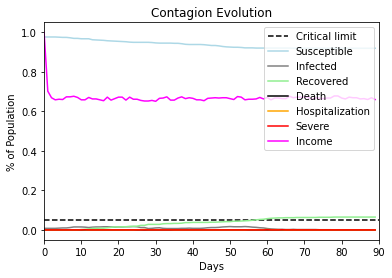

In [36]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [37]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[4876, 1523, 8095, 6231, 9744, 6897, 5493, 8678, 2157, 2418, 7829, 7415, 303, 3658, 7557, 6077, 3849, 1840, 6345, 8978, 7419, 7454, 4561, 9668, 8166, 6902, 6348, 6681, 3739, 4407]
run with seed 4876:
run with seed 1523:
run with seed 8095:
run with seed 6231:
run with seed 9744:
run with seed 6897:
run with seed 5493:
run with seed 8678:
run with seed 2157:
run with seed 2418:
run with seed 7829:
run with seed 7415:
run with seed 303:
run with seed 3658:
run with seed 7557:
run with seed 6077:
run with seed 3849:
run with seed 1840:
run with seed 6345:
run with seed 8978:
run with seed 7419:
run with seed 7454:
run with seed 4561:
run with seed 9668:
run with seed 8166:
run with seed 6902:
run with seed 6348:
run with seed 6681:
run with seed 3739:
run with seed 4407:
using average of time series:
stats on susceptible:
data: [0.9073111111111112, 0.925066666666667, 0.952711111111111, 0.9029555555555553, 0.9366744366744367, 0.9446327683615

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 3

Start with complete lockdown then gradually unlock schools on simulation day 30, 60 and 90


In [38]:
sc = 3
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

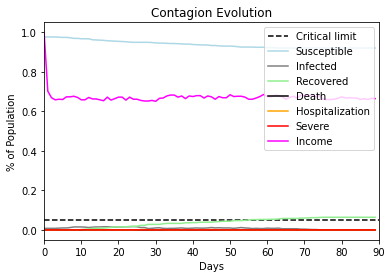

In [39]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [40]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[2109, 5944, 8691, 4785, 5599, 326, 450, 2540, 4610, 7864, 7099, 4725, 8674, 8005, 2798, 8930, 9443, 7298, 2648, 403, 5519, 4454, 6070, 2967, 1282, 1005, 6064, 7650, 4348, 8324]
run with seed 2109:
run with seed 5944:
run with seed 8691:
run with seed 4785:
run with seed 5599:
run with seed 326:
run with seed 450:
run with seed 2540:
run with seed 4610:
run with seed 7864:
run with seed 7099:
run with seed 4725:
run with seed 8674:
run with seed 8005:
run with seed 2798:
run with seed 8930:
run with seed 9443:
run with seed 7298:
run with seed 2648:
run with seed 403:
run with seed 5519:
run with seed 4454:
run with seed 6070:
run with seed 2967:
run with seed 1282:
run with seed 1005:
run with seed 6064:
run with seed 7650:
run with seed 4348:
run with seed 8324:
using average of time series:
stats on susceptible:
data: [0.5793666666666667, 0.9808888888888893, 0.9182, 0.7705444444444444, 0.7478111111111109, 0.7969888888888889, 0.9630220

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 4

Like scenario 3 but simulate the start of a public campaing in day 30 to reinforce the importance of social distancing and consequently reduce the overall risk tolerance of the population

In [41]:
sc = 4
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

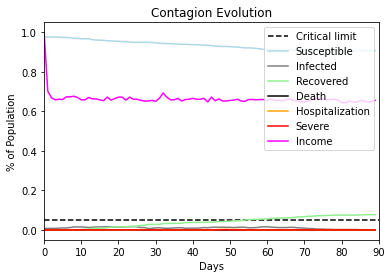

In [42]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [43]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[7808, 6023, 4826, 9931, 7903, 2852, 6634, 5278, 6780, 1613, 7089, 6345, 4704, 3392, 6734, 7399, 6587, 574, 1037, 5187, 7834, 3439, 1619, 4434, 2865, 9964, 2741, 8497, 7197, 9314]
run with seed 7808:
run with seed 6023:
run with seed 4826:
run with seed 9931:
run with seed 7903:
run with seed 2852:
run with seed 6634:
run with seed 5278:
run with seed 6780:
run with seed 1613:
run with seed 7089:
run with seed 6345:
run with seed 4704:
run with seed 3392:
run with seed 6734:
run with seed 7399:
run with seed 6587:
run with seed 574:
run with seed 1037:
run with seed 5187:
run with seed 7834:
run with seed 3439:
run with seed 1619:
run with seed 4434:
run with seed 2865:
run with seed 9964:
run with seed 2741:
run with seed 8497:
run with seed 7197:
run with seed 9314:
using average of time series:
stats on susceptible:
data: [0.9658555555555554, 0.7944610944610945, 0.9489333333333333, 0.8082111111111112, 0.9839999999999999, 0.97283333333

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 5

Like scenario 4 but start the campaing in day 1

In [44]:
sc = 5
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

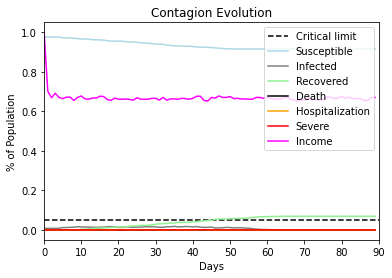

In [45]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [46]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[6493, 5314, 8001, 2323, 5275, 4898, 3825, 4774, 9068, 6783, 8942, 1769, 5689, 106, 140, 1611, 6388, 2725, 4935, 2079, 1261, 5949, 4072, 8775, 2828, 8383, 1147, 9642, 6459, 2212]
run with seed 6493:
run with seed 5314:
run with seed 8001:
run with seed 2323:
run with seed 5275:
run with seed 4898:
run with seed 3825:
run with seed 4774:
run with seed 9068:
run with seed 6783:
run with seed 8942:
run with seed 1769:
run with seed 5689:
run with seed 106:
run with seed 140:
run with seed 1611:
run with seed 6388:
run with seed 2725:
run with seed 4935:
run with seed 2079:
run with seed 1261:
run with seed 5949:
run with seed 4072:
run with seed 8775:
run with seed 2828:
run with seed 8383:
run with seed 1147:
run with seed 9642:
run with seed 6459:
run with seed 2212:
using average of time series:
stats on susceptible:
data: [0.6868666666666666, 0.6510645375914836, 0.968622222222222, 0.5809713905522289, 0.8396222222222223, 0.95921111111111

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 6

Begins with complete lockdown for 30 days, then all sectors are being gradually "unlocked"

In [47]:
sc = 6
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 120))

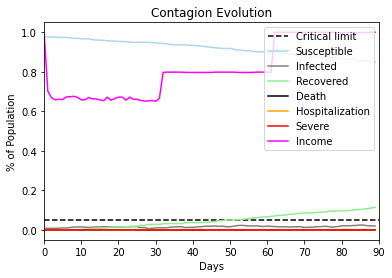

In [48]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [49]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[4586, 7654, 1627, 7273, 2076, 2469, 4032, 6961, 1794, 6080, 4433, 2983, 9149, 9435, 1390, 9527, 765, 689, 9249, 5589, 9005, 2111, 5009, 4685, 6674, 80, 3429, 9722, 3602, 2556]
run with seed 4586:
run with seed 7654:
run with seed 1627:
run with seed 7273:
run with seed 2076:
run with seed 2469:
run with seed 4032:
run with seed 6961:
run with seed 1794:
run with seed 6080:
run with seed 4433:
run with seed 2983:
run with seed 9149:
run with seed 9435:
run with seed 1390:
run with seed 9527:
run with seed 765:
run with seed 689:
run with seed 9249:
run with seed 5589:
run with seed 9005:
run with seed 2111:
run with seed 5009:
run with seed 4685:
run with seed 6674:
run with seed 80:
run with seed 3429:
run with seed 9722:
run with seed 3602:
run with seed 2556:
using average of time series:
stats on susceptible:
data: [0.9447444444444443, 0.6298444444444444, 0.7139385906781534, 0.5558888888888889, 0.9426240426240428, 0.5488666666666668,

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 7

Like scenario 6 but in day 1 a campaign to encourage social distancing is started and the overall risk tolerance of people starts decreasing gradually.

In [50]:
sc = 7
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 120))

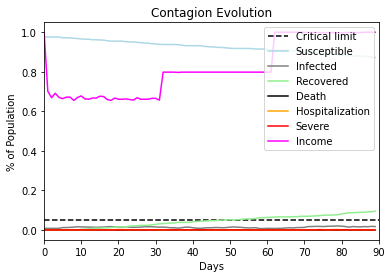

In [51]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [52]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[8261, 5446, 500, 5242, 5905, 7548, 6704, 41, 8406, 1755, 3251, 3512, 8168, 9487, 5788, 4954, 1541, 8281, 9831, 3543, 4563, 2037, 736, 3015, 6314, 4275, 1486, 873, 1894, 8341]
run with seed 8261:
run with seed 5446:
run with seed 500:
run with seed 5242:
run with seed 5905:
run with seed 7548:
run with seed 6704:
run with seed 41:
run with seed 8406:
run with seed 1755:
run with seed 3251:
run with seed 3512:
run with seed 8168:
run with seed 9487:
run with seed 5788:
run with seed 4954:
run with seed 1541:
run with seed 8281:
run with seed 9831:
run with seed 3543:
run with seed 4563:
run with seed 2037:
run with seed 736:
run with seed 3015:
run with seed 6314:
run with seed 4275:
run with seed 1486:
run with seed 873:
run with seed 1894:
run with seed 8341:
using average of time series:
stats on susceptible:
data: [0.9800999999999999, 0.7233888888888887, 0.959085359085359, 0.9612777777777777, 0.8551444444444444, 0.9801444444444447, 0.

(<function dict.items>, <function dict.items>, <function dict.items>)